Skenario ini menggunakan data tanpa dilakukan data prepration terlebih dahulu.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
path_data = "../dataset/pjk_dataset.csv"
data = pd.read_csv(path_data)

data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


Cek bagaimana distribusi datanya

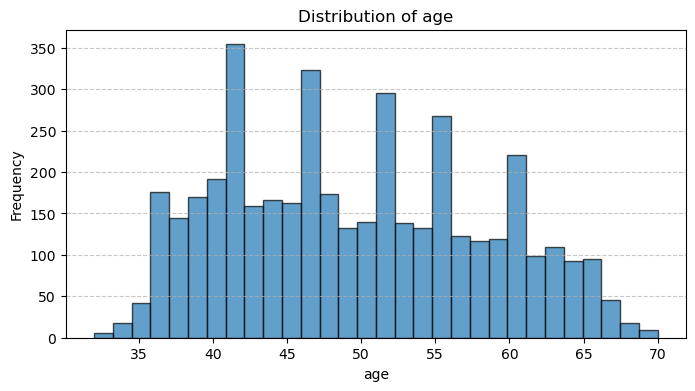

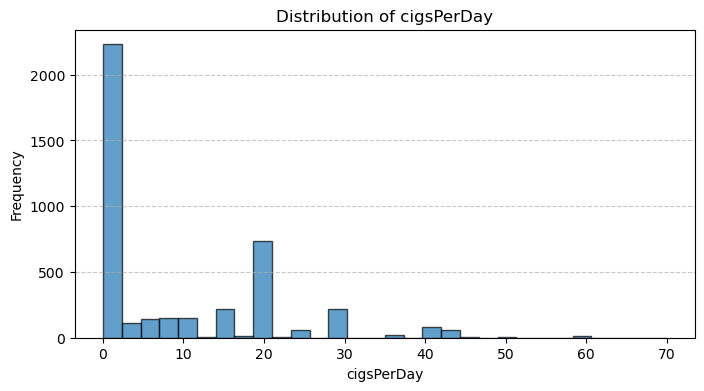

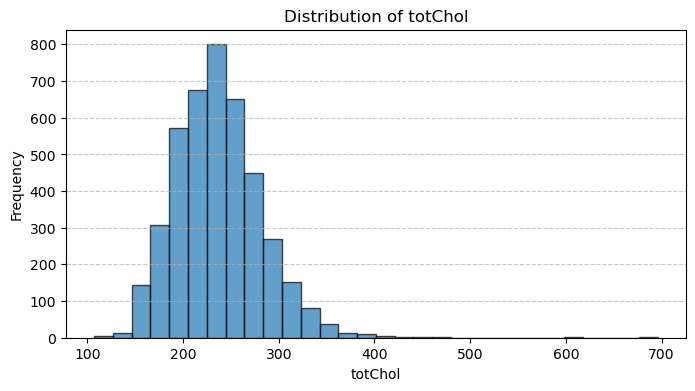

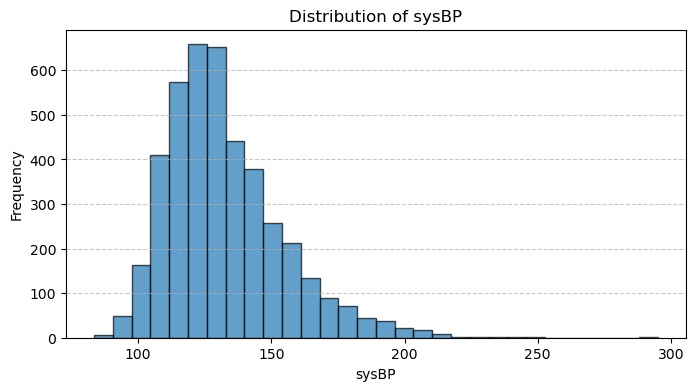

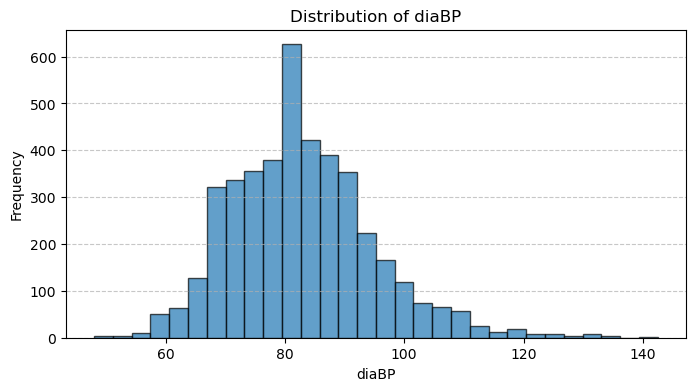

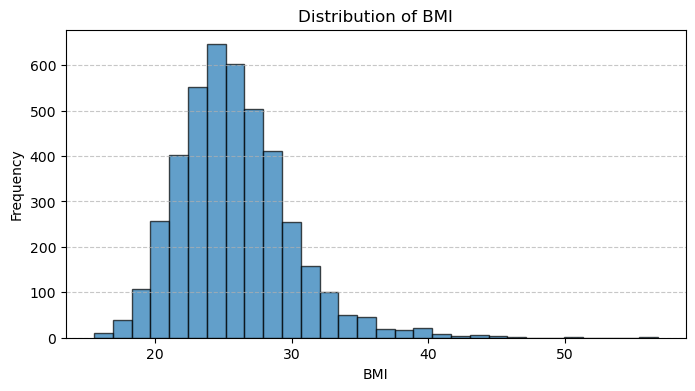

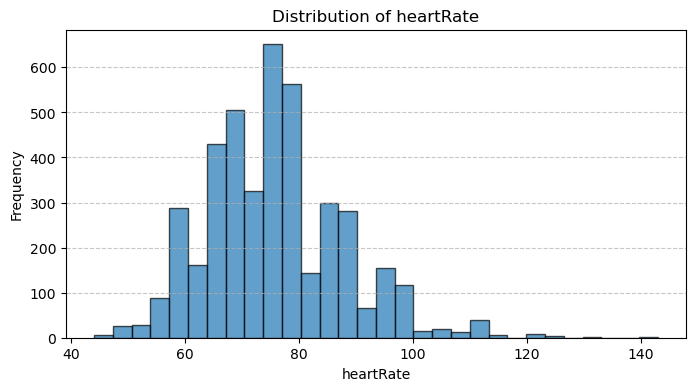

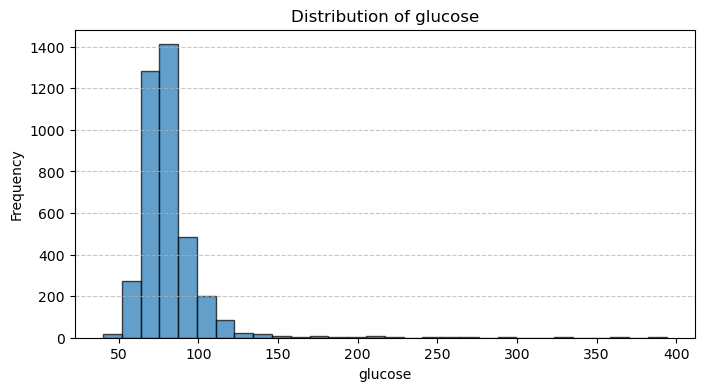

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0.0,2420.0,NaN,2145.0,4063.0,4215.0,2923.0,4131.0,3596.0
1.0,1820.0,1720.0,2095.0,124.0,25.0,1317.0,109.0,644.0
2.0,NaN,1253.0,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,689.0,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,473.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Cek distribusi fitur numerik
numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Cek distribusi fitur kategorikal
categorical_columns = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke',
                       'prevalentHyp', 'diabetes', 'TenYearCHD']

# Plot distribution of numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(data[col].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Summary for categorical columns
categorical_summary = data[categorical_columns].apply(pd.Series.value_counts)

categorical_summary

In [7]:
# Cek null
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
(data.isna().sum()*100)/len(data)

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

In [10]:
data.shape

(4240, 16)

In [11]:
data.dropna(inplace=True)

In [12]:
data.shape

(3658, 16)

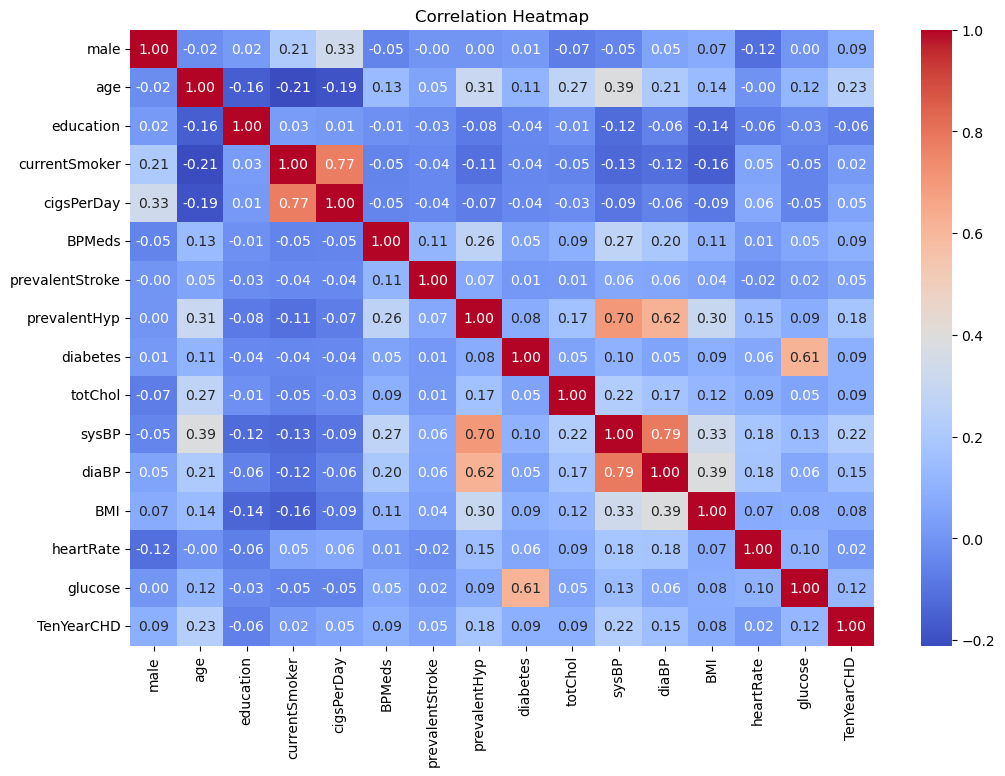

In [14]:
# Cek Korelasinya aja
numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

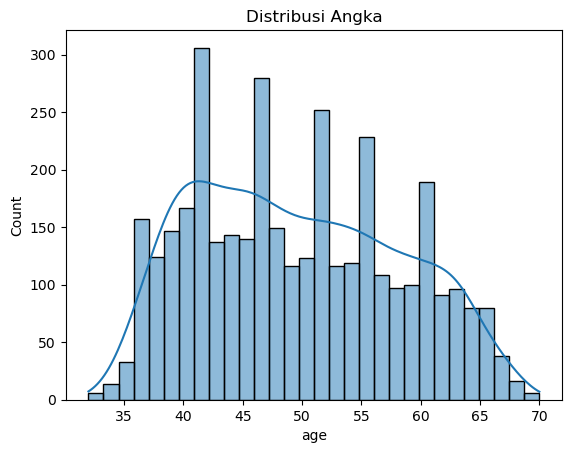

In [16]:
# Distribusi usia
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribusi Angka')
plt.show()

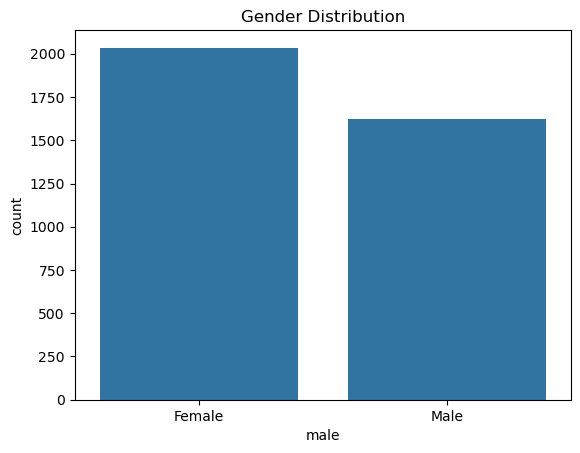

In [17]:
# Gender distribution
sns.countplot(x='male', data=data)
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

Pembuatan Model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Ini dipakai kalau misalnya nilai nullnya belum dihapus
# data = data.dropna()  # Drop rows with NaN for simplicity

# Splitting features and target
X = data.drop(columns=['TenYearCHD'])
y = data['TenYearCHD']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store results
results = {}

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }

# Display results
results_df = pd.DataFrame(results).T

In [23]:
# Sort results by Accuracy in descending order
results_sorted = results_df.sort_values(by="Accuracy", ascending=False)
results_sorted

,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Random Forest,0.837432,0.636364,0.057377,0.105263,0.695519
Logistic Regression,0.833333,0.500000,0.016393,0.031746,0.692959
Support Vector Machine,0.833333,0.000000,0.000000,0.000000,0.545015
Gradient Boosting,0.830601,0.437500,0.057377,0.101449,0.695875
K-Nearest Neighbors,0.826503,0.428571,0.122951,0.191083,0.650322


In [24]:
# Identify the best model based on Accuracy
best_model_name = results_sorted.index[0]
best_model = models[best_model_name]
best_model

RandomForestClassifier()

Accuracy: 0.84


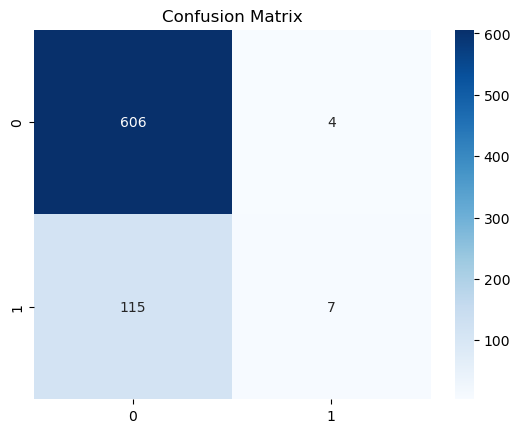

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report


# Predictions
predictions = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Generate classification report
report = classification_report(y_test, predictions, target_names=["Class 0", "Class 1"])

print(report)

              precision    recall  f1-score   support

     Class 0       0.84      0.99      0.91       610
     Class 1       0.64      0.06      0.11       122

    accuracy                           0.84       732
   macro avg       0.74      0.53      0.51       732
weighted avg       0.81      0.84      0.78       732



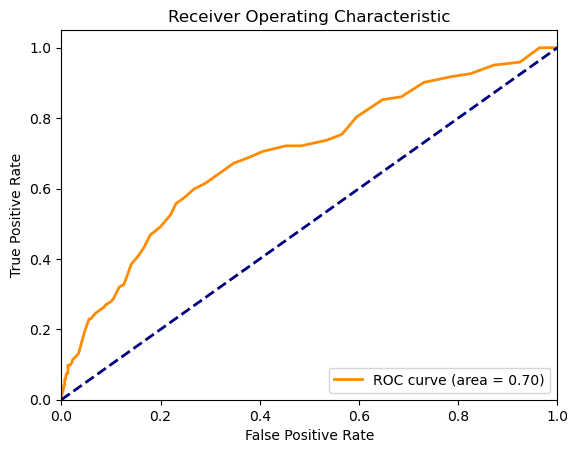

In [29]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [30]:
from sklearn.model_selection import cross_validate

# Perform cross-validation
cv_results = cross_validate(
    best_model,
    X,
    y,
    cv=5,  # 5-fold cross-validation
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=False
)

# Summarize cross-validation results
cv_summary = {
    "Accuracy": cv_results['test_accuracy'].mean(),
    "Precision": cv_results['test_precision'].mean(),
    "Recall": cv_results['test_recall'].mean(),
    "F1-Score": cv_results['test_f1'].mean()
}

cv_summary


{'Accuracy': 0.8463654848138263,
 'Precision': 0.4579473304473304,
 'Recall': 0.05749678249678249,
 'F1-Score': 0.10175846776301264}

Neural Network

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Define Neural Network architecture
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']  # Only accuracy for tracking
)

# Train the model
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)

# Display the results
print(f"Loss: {nn_loss:.4f}")
print(f"Accuracy: {nn_accuracy:.4f}")


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6807 - loss: 12.7714 - val_accuracy: 0.8333 - val_loss: 3.6111
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7272 - loss: 4.3249 - val_accuracy: 0.8333 - val_loss: 0.9458
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7279 - loss: 2.1392 - val_accuracy: 0.8333 - val_loss: 0.5785
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7755 - loss: 0.9181 - val_accuracy: 0.8320 - val_loss: 0.5013
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7850 - loss: 0.6615 - val_accuracy: 0.8320 - val_loss: 0.5303
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8146 - loss: 0.5536 - val_accuracy: 0.8320 - val_loss: 0.4961
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8264 - loss: 0.5289 - val_accuracy: 0.8333 - val_loss: 0.4892
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8312 - loss: 0.4956 - val_accuracy: 0.8333 - val_loss